In [1]:
# 1 Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Praktikum 5/data/Iris.csv')
display(df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# 2 Info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# 3 Data Preprocessing
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [5]:
# 4 Cek ada yang duplikat apa ngga
df.duplicated().sum()

np.int64(0)

In [6]:
# 5 Ubah nama kolom biar rapi
df.columns = ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

In [7]:
# 7 Info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


/tmp/ipython-input-2496239393.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=df, palette='pastel')


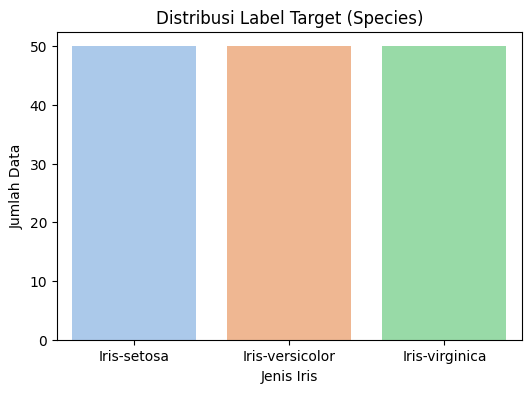

In [8]:
# 8 Visualisasi Distribusi Label Target (Species)
plt.figure(figsize=(6,4))
sns.countplot(x='Species', data=df, palette='pastel')
plt.title('Distribusi Label Target (Species)')
plt.xlabel('Jenis Iris')
plt.ylabel('Jumlah Data')
plt.show()

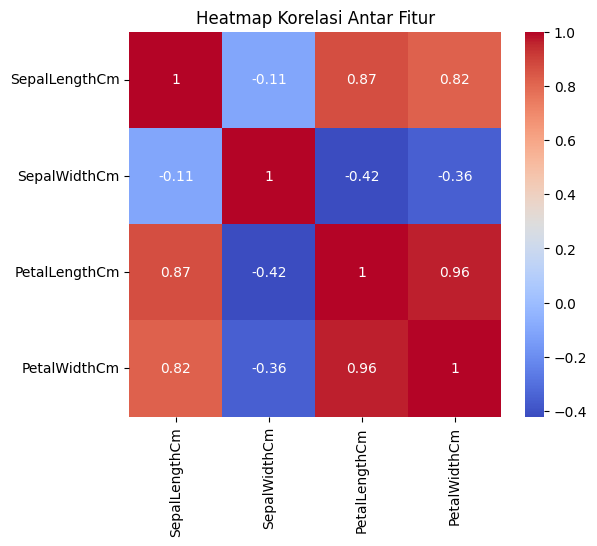

In [9]:
# 9 Pembuatan Model Decision Tree
plt.figure(figsize=(6,5))
sns.heatmap(df.iloc[:,1:5].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

In [10]:
# 10  Splitting Data (Training dan Testing)
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [11]:
# 11 Evaluasi Model
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n🔹 Jumlah Data Training: {X_train.shape[0]}")
print(f"🔹 Jumlah Data Testing: {X_test.shape[0]}")


🔹 Jumlah Data Training: 120
🔹 Jumlah Data Testing: 30


In [12]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [13]:
# 12 Visualisasi Confusion Matrix
y_pred = model.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)

print(f"\n🔹 Akurasi Model: {akurasi*100:.2f}%")
print("\n🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))


🔹 Akurasi Model: 93.33%

🔹 Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

🔹 Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



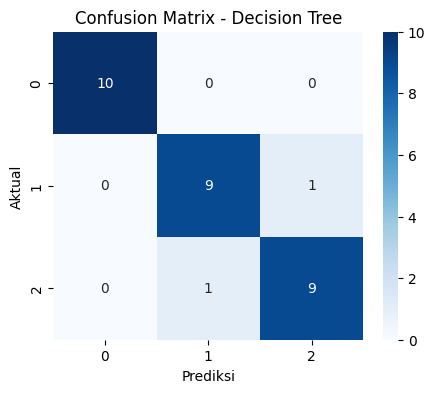

In [14]:
# 13 Visualisasi Hasil Model Decision Tree
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

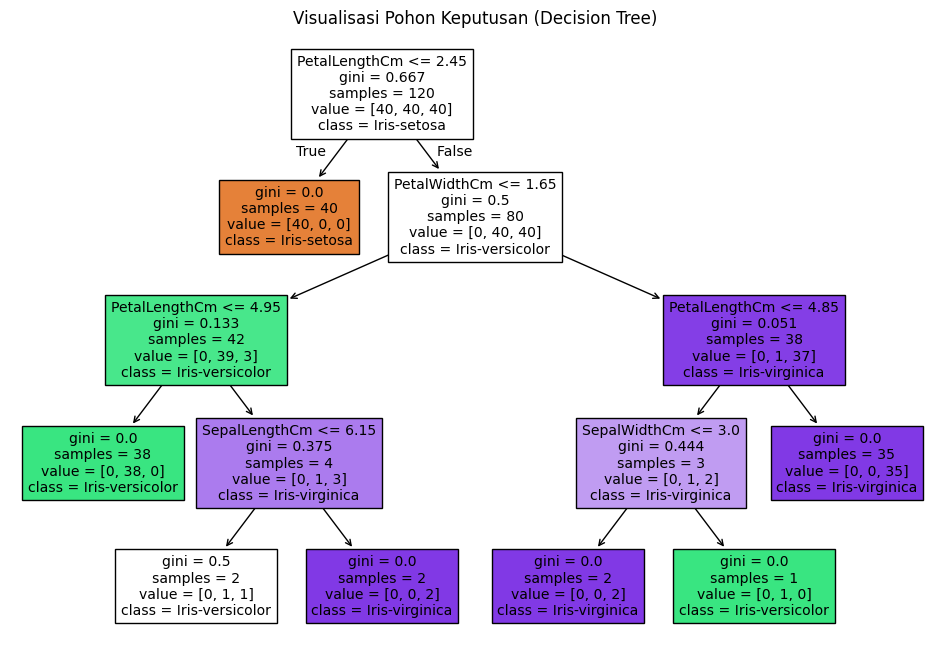

In [18]:
# 14 Feature Importance
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title("Visualisasi Pohon Keputusan (Decision Tree)")
plt.show()


🔹 Tingkat Pentingnya Setiap Fitur:


,Feature,Importance
2,PetalLengthCm,0.565639
3,PetalWidthCm,0.411154
1,SepalWidthCm,0.016878
0,SepalLengthCm,0.006329


/tmp/ipython-input-2563726819.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


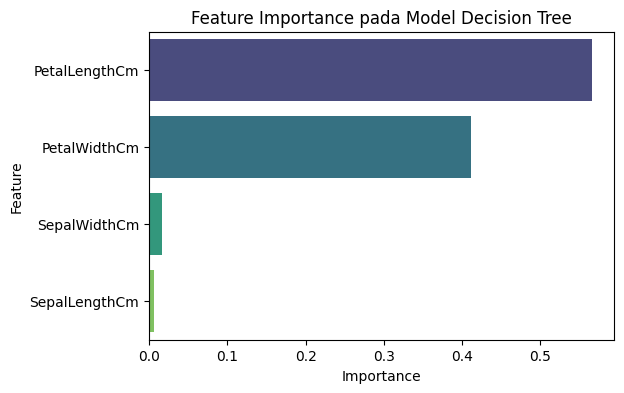

In [16]:
# 15 Hyperparameter Tuning (Mencari max_depth terbaik)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔹 Tingkat Pentingnya Setiap Fitur:")
display(importance)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title('Feature Importance pada Model Decision Tree')
plt.show()